<a href="https://colab.research.google.com/github/mobley-trent/kaggle/blob/master/recommendation_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RECOMMENDATION SYSTEM

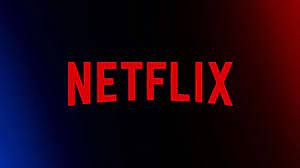

A recommendation system is a type of information filtering system that predicts the preferences or interests of a user and provides recommendations based on those predictions. Recommendation systems are widely used in various industries, including e-commerce, entertainment, social media, and content platforms.

There are basically three types of recommender systems:

1. **Demographic Filtering** - They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

2. **Content Based Filtering** -  They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

3. **Collaborative Filtering** - This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

In [1]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle kernels list — user YOUR_USER — sort-by dateRun

!kaggle datasets download -d rounakbanik/the-movies-dataset

Saving kaggle.json to kaggle.json
kaggle.json
usage: kaggle
       [-h]
       [-v]
       {competitions,c,datasets,d,kernels,k,config}
       ...
kaggle: error: unrecognized arguments: — user YOUR_USER — sort-by dateRun
 96% 219M/228M [00:01<00:00, 228MB/s]
100% 228M/228M [00:01<00:00, 210MB/s]


In [2]:
!unzip the-movies-dataset.zip

Archive:  the-movies-dataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


In [3]:
import pandas as pd
import numpy as np

credits = pd.read_csv('/content/credits.csv')
keywords = pd.read_csv('/content/keywords.csv')
links = pd.read_csv('/content/links.csv')
links_small = pd.read_csv('/content/links_small.csv')
movies_metadata = pd.read_csv('/content/movies_metadata.csv')
ratings = pd.read_csv('/content/ratings.csv')
ratings_small = pd.read_csv('/content/ratings_small.csv')

credits.name = 'Credits'
keywords.name = 'Keywords'
links.name = 'Links'
links_small.name = 'Links small'
movies_metadata.name = 'Movies metadata'
ratings.name = 'Ratings'
ratings_small.name = 'Ratings small'

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
datasets = [credits, keywords, links, links_small, movies_metadata, ratings, ratings_small]

for df in datasets:
    print("DataFrame name:", df.name)
    print("Shape:", df.shape)
    print("Info:")
    print(df.info())
    print("Descriptive statistics:")
    print(df.describe())
    print('\n\n')
    print("=====================================")
    print('\n\n')

DataFrame name: Credits
Shape: (45476, 3)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
None
Descriptive statistics:
                  id
count   45476.000000
mean   108345.997537
std    112443.796536
min         2.000000
25%     26443.250000
50%     60002.500000
75%    157302.000000
max    469172.000000






DataFrame name: Keywords
Shape: (46419, 2)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB
None
Descriptive statistics:


In [ ]:
for dataset in datasets:
    print(f"Exploring {dataset.name}...")
    print(f"Shape: {dataset.shape}")
    print(f"Columns: {dataset.columns}")
    print(f"Missing values: {dataset.isnull().sum().sum()}")
    print(f"Duplicated data: {dataset.duplicated().sum()}")
    print('\n\n')
    print("=====================================")
    print('\n\n')

Exploring Credits...
Shape: (45476, 3)
Columns: Index(['cast', 'crew', 'id'], dtype='object')
Missing values: 0
Duplicated data: 37






Exploring Keywords...
Shape: (46419, 2)
Columns: Index(['id', 'keywords'], dtype='object')
Missing values: 0
Duplicated data: 987






Exploring Links...
Shape: (45843, 3)
Columns: Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
Missing values: 219
Duplicated data: 0






Exploring Links small...
Shape: (9125, 3)
Columns: Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
Missing values: 13
Duplicated data: 0






Exploring Movies metadata...
Shape: (45466, 24)
Columns: Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_c

In [ ]:
for df in datasets:
    print("DataFrame name:", df.name)
    print("Head:")
    display(df.head())
    print('\n\n')
    print("=====================================")
    print('\n\n')

DataFrame name: Credits
Head:


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862








DataFrame name: Keywords
Head:


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."








DataFrame name: Links
Head:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0








DataFrame name: Links small
Head:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0








DataFrame name: Movies metadata
Head:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0








DataFrame name: Ratings
Head:


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556








DataFrame name: Ratings small
Head:


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
df1 = credits.copy()
df2 = movies_metadata.copy()

df2['id'] = pd.to_numeric(df2['id'], errors='coerce').fillna(-1).astype('int64')
df2 = df2.merge(df1, on='id')
df2 = pd.merge(df2, keywords.drop_duplicates().reset_index(), on='id')

In [ ]:
df2.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


## DEMOGRAPHIC FILTERING

Before getting started, we need:

- a metric to score/rate a movie
- calculate the score for every movie
- sort the scores and recommend the best rated movie to the users

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr)

It is calculated as follows:

In [5]:
C= df2['vote_average'].mean()               # mean vote across the whole report
m= df2['vote_count'].quantile(0.9)          # minimum votes required to be listed in the chart
q_movies = df2.loc[df2['vote_count'] >= m].copy()  # qualified movies

q_movies.shape

(4563, 28)

4563 movies qualify to be in this list. Now, we need to calculate the metric for each qualified movie. To do this, we will define a function `weighted_rating` and define a new feature `score`, of which we'll calculate the value by applying this function to our DataFrame of qualified movies.

In [6]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [7]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [8]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445870
837,The Godfather,6024.0,8.5,8.425439
10345,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421458
12525,The Dark Knight,12269.0,8.3,8.265477
2854,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206640
23742,Whiplash,4376.0,8.3,8.205405
5501,Spirited Away,3968.0,8.3,8.196056
2219,Life Is Beautiful,3643.0,8.3,8.187173


This is a very basic recommender that returns the most popular movies at the moment.

Text(0.5, 1.0, 'Popular Movies')

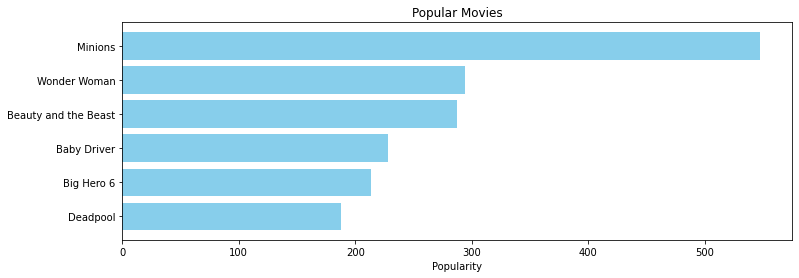

In [9]:
df2['popularity'] = df2['popularity'].astype(float)
pop = df2.sort_values('popularity', ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

## CONTENT BASED FILTERING

In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

<img src='https://image.ibb.co/f6mDXU/conten.png' width='500' height='300'>

### Plot description based Recommender

In [10]:
df2[['overview']].head()

,overview
0,"Led by Woody, Andy's toys live happily in his ..."
1,When siblings Judy and Peter discover an encha...
2,A family wedding reignites the ancient feud be...
3,"Cheated on, mistreated and stepped on, the wom..."
4,Just when George Banks has recovered from his ...


The next step is text preprocessing. We will now compute the **Term Frequency-Inverse Document Frequency** vectors for each overview.

Term Frequency is the total number of instances of a word in a row of data i.e a document. Inverse Document Frequency is the relative count of documents containing the term and is given by the formula `log(number of documents/documents with term)`. The overall importance of each word to the documents in which they appear is equal to `TF * IDF`.

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Scikit-Learn provides a built in `TfidfVectorizer` that produces the matrix in a few lines of code.

In [11]:
df3 = links_small.copy()
df3 = df3[df3['tmdbId'].notnull()]['tmdbId'].astype('int')

df2_small = df2[df2['id'].isin(df3)].copy()

We reduce the size of the dataset by only including movies in the `links_small` dataset. This makes computation easier.

In [12]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2_small['overview'] = df2_small['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2_small['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(9133, 29727)

Over 75000 different words were used to describe the 9133 movies in the dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. It is calculated by taking the dot product of the two vectors and dividing by the product of their lengths.

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's `linear_kernel()` instead of `cosine_similarities()` since it is faster.

In [13]:
%%time

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

CPU times: user 790 ms, sys: 889 ms, total: 1.68 s
Wall time: 1.82 s


In [14]:
%%time

from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

CPU times: user 608 ms, sys: 800 ms, total: 1.41 s
Wall time: 1.41 s


We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [15]:
df2_small = df2_small.reset_index()
titles = df2_small['title']

#Construct a reverse map of indices and movie titles
indices = pd.Series(df2_small.index, index=df2_small['title']).drop_duplicates()

We will build the recommendation engine using the following steps:

- Get the index of the movie given its title.
- Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
- Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
- Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
- Return the titles corresponding to the indices of the top elements.

In [16]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return titles.iloc[movie_indices]

In [17]:
get_recommendations('American Gangster')

3846                           Invasion U.S.A.
6359    Looking for Comedy in the Muslim World
1278                                   Hoodlum
5630                                 Born Rich
5819                                   La Luna
9026                                Narcopolis
8129                              The Campaign
1520                     The French Connection
8969                  Requiem For The Big East
2410                        Music of the Heart
Name: title, dtype: object

In [18]:
get_recommendations('Toy Story')

7573               Toy Story 3
2510               Toy Story 2
6223    The 40 Year Old Virgin
898      Rebel Without a Cause
6587    For Your Consideration
2555           Man on the Moon
437                     Malice
1607                 Condorman
6660              Factory Girl
5011          Rivers and Tides
Name: title, dtype: object

In [19]:
get_recommendations('The Dark Knight Rises')

132                              Batman Forever
6933                            The Dark Knight
1122                             Batman Returns
7603                 Batman: Under the Red Hood
524                                      Batman
7941                           Batman: Year One
8205    Batman: The Dark Knight Returns, Part 1
2587               Batman: Mask of the Phantasm
8270    Batman: The Dark Knight Returns, Part 2
6174                              Batman Begins
Name: title, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

### Credits, Genres and Keywords Based Recommender

We can increase the quality of the recommender system by using better metadata. We will create a new recommender based on the following metadata:
- 3 top actors.
- the director.
- related genres.
- movie plot keywords.



In [20]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2_small[feature] = df2_small[feature].apply(literal_eval)

Next, we'll write functions that will help us to extract the required information from each feature.

In [21]:
df2_small[['cast', 'crew', 'keywords', 'genres']]

,cast,crew,keywords,genres
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'id': 35, 'name': 'Comedy'}]"
...,...,...,...,...
9128,"[{'cast_id': 1, 'character': 'Henry Cobb', 'cr...","[{'credit_id': '544475aac3a36819fb000578', 'de...","[{'id': 6054, 'name': 'friendship'}, {'id': 20...","[{'id': 18, 'name': 'Drama'}]"
9129,"[{'cast_id': 0, 'character': 'Rustom Pavri', '...","[{'credit_id': '5951baf692514129c4016600', 'de...","[{'id': 10540, 'name': 'bollywood'}]","[{'id': 53, 'name': 'Thriller'}, {'id': 10749,..."
9130,"[{'cast_id': 0, 'character': 'Sarman', 'credit...","[{'credit_id': '57cd5d3592514179d50018e8', 'de...","[{'id': 10540, 'name': 'bollywood'}]","[{'id': 12, 'name': 'Adventure'}, {'id': 18, '..."
9131,"[{'cast_id': 4, 'character': 'Rando Yaguchi : ...","[{'credit_id': '560892fa92514177550018b2', 'de...","[{'id': 1299, 'name': 'monster'}, {'id': 7671,...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


In [22]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan


# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [23]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2_small['director'] = df2_small['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2_small[feature] = df2_small[feature].apply(get_list)

In [24]:
# Print the new features of the first 3 films
df2_small[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,"[jealousy, toy, boy]","[Animation, Comedy, Family]"
1,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,"[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,"[fishing, best friend, duringcreditsstinger]","[Romance, Comedy]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [25]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):

    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
        
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [26]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2_small[feature] = df2_small[feature].apply(clean_data)

We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [27]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

df2_small['soup'] = df2_small.apply(create_soup, axis=1)

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the `CountVectorizer()` instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [28]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2_small['soup'])

In [29]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [30]:
# Reset index of our main DataFrame and construct reverse mapping as before

indices = pd.Series(df2_small.index, index=df2_small['title'])

We can now reuse our `get_recommendations()` function by passing in the new `cosine_sim2` matrix as your second argument.

In [31]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

6933                  The Dark Knight
6174                    Batman Begins
5400                         Mitchell
467                 Romeo Is Bleeding
6575                     The Prestige
3627                  An Innocent Man
8663     Revenge of the Green Dragons
8859          Kidnapping Mr. Heineken
9053                     İtirazım Var
2039    Beyond the Poseidon Adventure
Name: title, dtype: object

In [32]:
get_recommendations('The Dark Knight Rises')

132                              Batman Forever
6933                            The Dark Knight
1122                             Batman Returns
7603                 Batman: Under the Red Hood
524                                      Batman
7941                           Batman: Year One
8205    Batman: The Dark Knight Returns, Part 1
2587               Batman: Mask of the Phantasm
8270    Batman: The Dark Knight Returns, Part 2
6174                              Batman Begins
Name: title, dtype: object

In [33]:
get_recommendations('The Godfather', cosine_sim2)

1590    The Godfather: Part III
982      The Godfather: Part II
5400                   Mitchell
969              Apocalypse Now
3288           Gardens of Stone
4124                The Gambler
5                          Heat
380               Carlito's Way
892         Glengarry Glen Ross
1192              Donnie Brasco
Name: title, dtype: object

In [36]:
get_recommendations('Transformers', cosine_sim2)

7276    Transformers: Revenge of the Fallen
7847         Transformers: Dark of the Moon
8625        Transformers: Age of Extinction
2822                               Predator
8661           Teenage Mutant Ninja Turtles
8802                         Fantastic Four
1804                     Six-String Samurai
7160                              Replicant
8350                            After Earth
1120    Star Trek III: The Search for Spock
Name: title, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. We can add additional features e.g production_company . We can also increase the weight of the director , by adding the feature multiple times in the soup.

## COLLABORATIVE FILTERING

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

The engine also doesn't capture the tastes and biases of a user. Anyone querying the engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers. There are two types:

- **User Based Filtering**:  These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use [pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) or cosine similarity.

- **Item Based Filtering**:  Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. However, several problems remain for this method. First, the main issue is scalability. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. In addition, sparsity is another concern.

### Single Value Decomposition

One way to handle the scalability and sparsity issue created by CF is to leverage a **latent factor model** to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). The lower the RMSE, the better the performance.

A latent factor describes a property or concept that a user or an item have.  For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. Th figure below illustrates this idea.

<img src="https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png">

In [ ]:
# !pip install surprise

In [44]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

reader = Reader()

data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)
model = SVD()

# cross-validation with no. of kfold=5 (can be changed per your need)
cross_validate(model, data, measures=['rmse', 'mae'], cv=5)

{'test_rmse': array([0.88853923, 0.90538458, 0.9007669 , 0.89820937, 0.89224233]),
 'test_mae': array([0.68277593, 0.69739135, 0.6941138 , 0.69241774, 0.68753374]),
 'fit_time': (1.951413869857788,
  3.590128183364868,
  1.5880343914031982,
  1.5169992446899414,
  1.5588622093200684),
 'test_time': (0.27403759956359863,
  0.16588807106018066,
  0.3256990909576416,
  0.14185261726379395,
  0.2867286205291748)}

We get a mean Root Mean Sqaure Error of 0.89 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [45]:
trainset = data.build_full_trainset()
model.fit(trainset)

Let us pick user with user Id 1 and check the ratings she/he has given.

In [49]:
ratings_small[ratings_small['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [50]:
model.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.6044335617957315, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction of `2.604`. The recommender engine doesn't care what the movie is or its contents. It purely works on the basis of the movie ID and tries to predict the ratings based on how other users have rated the movie.

# CONCLUSION

We createS recommenders using demographic , content- based and collaborative filtering. While demographic filtering is very elemantary and cannot be used practically, **Hybrid Systems** can take advantage of content-based and collaborative filtering as the two approaches are proved to be almost complimentary. This model was very baseline and only provides a fundamental framework to start with.

**REFERENCES** :

1. [Hackernoon Tutorial](https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75)
2. [Kaggle](https://www.kaggle.com/rounakbanik/movie-recommender-systems)